In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-24 16:21:57.299351: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 16:21:57.305068: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 16:21:57.375274: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 16:22:01.723434: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


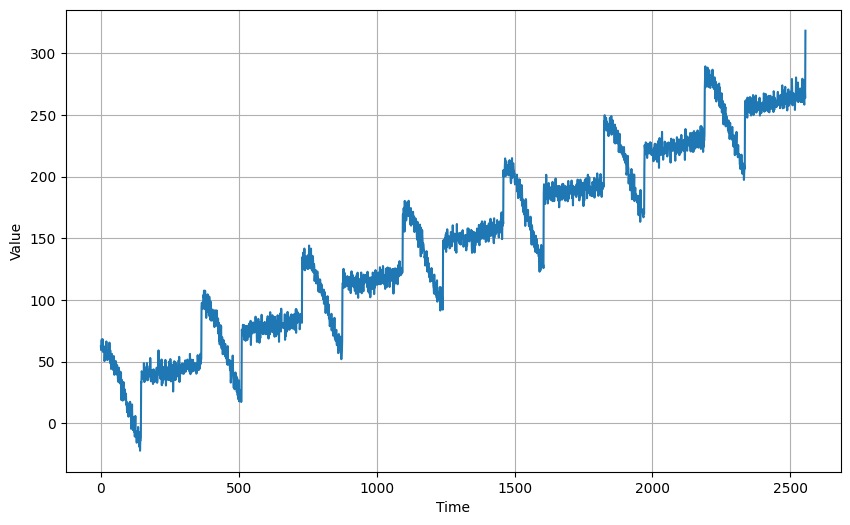

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise


time = np.arange(7 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 50
slope = 0.1
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

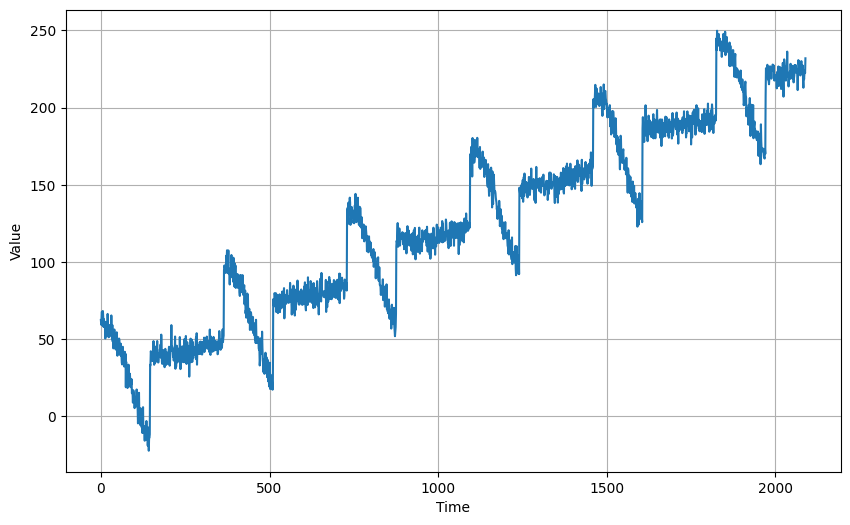

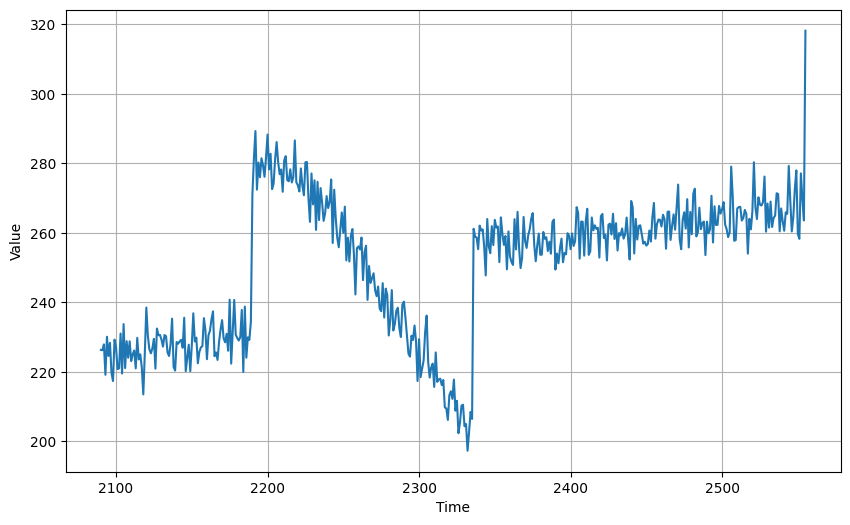

In [3]:
split_time = 365*6-100

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

plot_series(time_train, x_train)
plot_series(time_valid, x_valid)

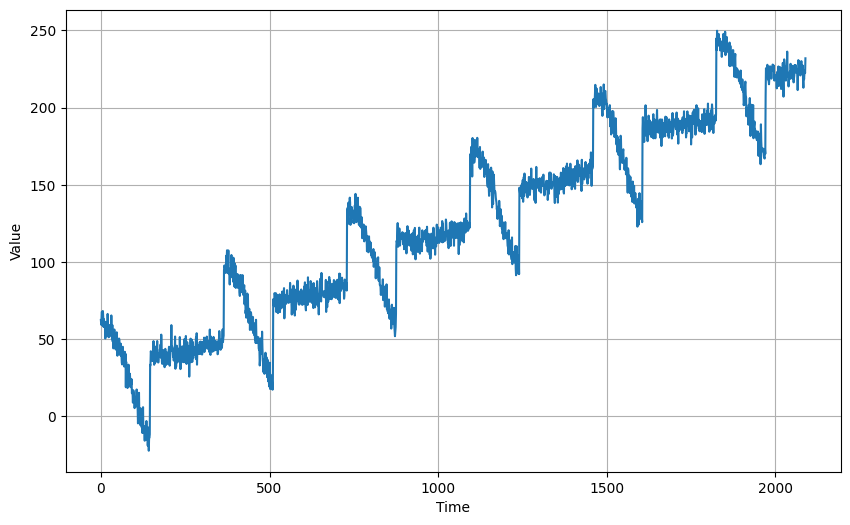

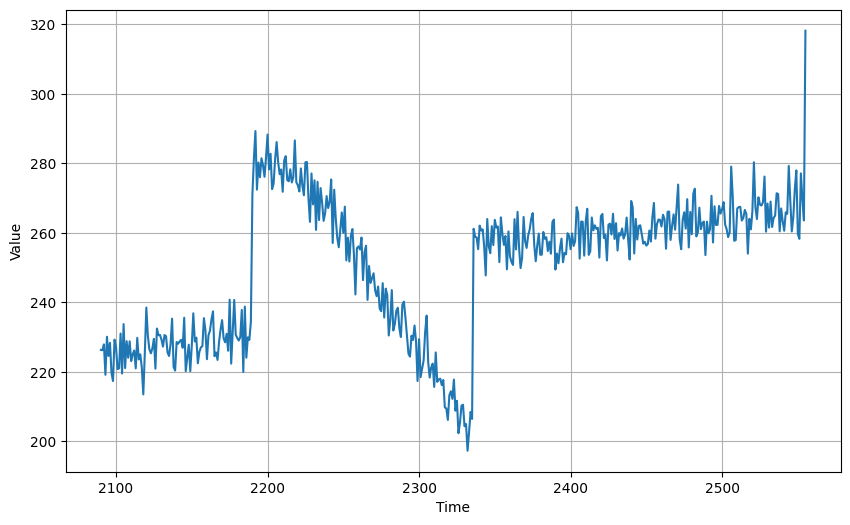

In [4]:
x_train_reshaped = x_train.reshape(-1, 1)
x_valid_reshaped = x_valid.reshape(-1, 1)
plot_series(time_train, x_train_reshaped)
plot_series(time_valid, x_valid_reshaped)

In [5]:
window_size = 30

x_train_window =[]
y_train_window =[]
x_valid_window =[]
y_valid_window =[]

for i in range (window_size, split_time):
    x_train_window.append(x_train_reshaped[i-window_size:i, 0])
    y_train_window.append(x_train_reshaped[i, 0])



for i in range (window_size,time_valid.shape[0] ):
  x_valid_window.append(x_valid_reshaped[i-window_size:i,0])
  y_valid_window.append(x_valid_reshaped[i,0])

X_train, y_train, X_valid, y_valid = np.array(x_train_window), np.array(y_train_window), np.array(x_valid_window), np.array(y_valid_window)

2024-04-24 16:22:11.119166: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 16:22:11.120225: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/p/pakrit/pytorchRL/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - loss: 18909.1855 - mean_absolute_error: 122.4352 - val_loss: 57453.3945 - val_mean_absolute_error: 238.9009
Epoch 2/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - loss: 16142.8525 - mean_absolute_error: 111.9464 - val_loss: 55652.9531 - val_mean_absolute_error: 235.1025
Epoch 3/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step - loss: 15335.6914 - mean_absolute_error: 107.7189 - val_loss: 53948.2930 - val_mean_absolute_error: 231.4488
Epoch 4/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - loss: 14077.7021 - mean_absolute_error: 101.8121 - val_loss: 52373.2109 - val_mean_absolute_error: 228.0208
Epoch 5/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - loss: 13859.4941 - mean_absolute_error: 101.0312 - val_loss: 50885.7734 - val_mean_absolute_error: 224.7354
Epoch 6/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - loss: 13478.4355 - mean_absolute_error: 99.1159 - val_loss: 49446.6875 - val_mean_absolute_error: 221.5106
Epoch 7/1000
33

33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step - loss: 4351.4180 - mean_absolute_error: 55.2440 - val_loss: 21649.8867 - val_mean_absolute_error: 145.8428
Epoch 43/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - loss: 4338.4712 - mean_absolute_error: 55.8840 - val_loss: 21350.6211 - val_mean_absolute_error: 144.8132
Epoch 44/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - loss: 4300.6665 - mean_absolute_error: 55.4446 - val_loss: 21035.8164 - val_mean_absolute_error: 143.7222
Epoch 45/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - loss: 4099.1450 - mean_absolute_error: 54.0162 - val_loss: 20743.7109 - val_mean_absolute_error: 142.7023
Epoch 46/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - loss: 4114.3726 - mean_absolute_error: 53.9295 - val_loss: 20475.7422 - val_mean_absolute_error: 141.7603
Epoch 47/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - loss: 4187.9604 - mean_absolute_error: 55.2684 - val_loss: 20187.6855 - val_mean_absolute_error: 140.7406
Epoch 48/1000
33/33 ━━━━━━━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - loss: 4025.1926 - mean_absolute_error: 53.7363 - val_loss: 16769.0273 - val_mean_absolute_error: 128.0206
Epoch 84/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - loss: 3988.1187 - mean_absolute_error: 53.6274 - val_loss: 16753.8711 - val_mean_absolute_error: 127.9614
Epoch 85/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - loss: 4019.0227 - mean_absolute_error: 54.2501 - val_loss: 16760.2012 - val_mean_absolute_error: 127.9861
Epoch 86/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - loss: 3952.6394 - mean_absolute_error: 53.4201 - val_loss: 16729.2617 - val_mean_absolute_error: 127.8652
Epoch 87/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - loss: 3818.0012 - mean_absolute_error: 51.9683 - val_loss: 16737.9160 - val_mean_absolute_error: 127.8990
Epoch 88/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 3899.6980 - mean_absolute_error: 53.3274 - val_loss: 16724.7324 - val_mean_absolute_error: 127.8475
Epoch 89/1000
33/33 ━━━━━━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - loss: 3976.8267 - mean_absolute_error: 53.5886 - val_loss: 16750.3320 - val_mean_absolute_error: 127.9476
Epoch 125/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - loss: 4066.8154 - mean_absolute_error: 54.2206 - val_loss: 16663.8398 - val_mean_absolute_error: 127.6091
Epoch 126/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - loss: 3516.1091 - mean_absolute_error: 49.6052 - val_loss: 16388.8027 - val_mean_absolute_error: 126.5270
Epoch 127/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - loss: 2273.2124 - mean_absolute_error: 36.4147 - val_loss: 15209.4277 - val_mean_absolute_error: 121.7772
Epoch 128/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - loss: 1929.1377 - mean_absolute_error: 33.4226 - val_loss: 14235.7832 - val_mean_absolute_error: 117.7116
Epoch 129/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - loss: 1620.8665 - mean_absolute_error: 28.6062 - val_loss: 13258.7012 - val_mean_absolute_error: 113.4854
Epoch 130/1000
33/33 ━━━━━━━━━

Epoch 166/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - loss: 175.7104 - mean_absolute_error: 9.5666 - val_loss: 3293.5120 - val_mean_absolute_error: 53.9833
Epoch 167/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 189.1576 - mean_absolute_error: 9.7016 - val_loss: 3221.8098 - val_mean_absolute_error: 53.3181
Epoch 168/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - loss: 197.5183 - mean_absolute_error: 10.1832 - val_loss: 3141.0229 - val_mean_absolute_error: 52.5584
Epoch 169/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - loss: 190.8629 - mean_absolute_error: 10.0036 - val_loss: 3064.4939 - val_mean_absolute_error: 51.8290
Epoch 170/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 165.7015 - mean_absolute_error: 9.4347 - val_loss: 2992.4639 - val_mean_absolute_error: 51.1319
Epoch 171/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - loss: 180.3523 - mean_absolute_error: 9.4101 - val_loss: 2916.8916 - val_mean_absolute_error: 50.3918
Epoch 172/1000
33/33 ━━━━━━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - loss: 117.8955 - mean_absolute_error: 8.3434 - val_loss: 1448.3818 - val_mean_absolute_error: 33.5642
Epoch 209/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - loss: 127.7782 - mean_absolute_error: 8.2689 - val_loss: 1435.7212 - val_mean_absolute_error: 33.5728
Epoch 210/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step - loss: 126.2076 - mean_absolute_error: 8.4701 - val_loss: 1417.9332 - val_mean_absolute_error: 33.1732
Epoch 211/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - loss: 133.1114 - mean_absolute_error: 8.5272 - val_loss: 1396.6956 - val_mean_absolute_error: 32.9168
Epoch 212/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - loss: 123.7321 - mean_absolute_error: 8.2343 - val_loss: 1388.1598 - val_mean_absolute_error: 32.7749
Epoch 213/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - loss: 123.3575 - mean_absolute_error: 8.2153 - val_loss: 1373.4784 - val_mean_absolute_error: 32.6431
Epoch 214/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/

33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - loss: 122.1295 - mean_absolute_error: 8.2660 - val_loss: 1051.0139 - val_mean_absolute_error: 27.8670
Epoch 251/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - loss: 101.7974 - mean_absolute_error: 7.5012 - val_loss: 1036.5275 - val_mean_absolute_error: 27.6329
Epoch 252/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - loss: 103.4882 - mean_absolute_error: 7.6216 - val_loss: 1048.9460 - val_mean_absolute_error: 28.0300
Epoch 253/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 98.8537 - mean_absolute_error: 7.4948 - val_loss: 1022.1846 - val_mean_absolute_error: 27.4017
Epoch 254/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - loss: 107.7342 - mean_absolute_error: 7.9216 - val_loss: 1013.7480 - val_mean_absolute_error: 27.2904
Epoch 255/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 109.9511 - mean_absolute_error: 8.0292 - val_loss: 1009.5822 - val_mean_absolute_error: 27.4113
Epoch 256/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/ste

33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - loss: 111.0474 - mean_absolute_error: 7.8204 - val_loss: 797.7402 - val_mean_absolute_error: 24.3323
Epoch 293/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 102.5652 - mean_absolute_error: 7.5656 - val_loss: 804.4320 - val_mean_absolute_error: 23.9905
Epoch 294/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - loss: 97.4454 - mean_absolute_error: 7.4875 - val_loss: 780.3538 - val_mean_absolute_error: 23.7880
Epoch 295/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 103.5358 - mean_absolute_error: 7.5618 - val_loss: 789.3585 - val_mean_absolute_error: 24.0206
Epoch 296/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 114.1497 - mean_absolute_error: 7.8260 - val_loss: 782.1713 - val_mean_absolute_error: 23.8544
Epoch 297/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 113.3809 - mean_absolute_error: 7.9297 - val_loss: 832.7708 - val_mean_absolute_error: 24.4685
Epoch 298/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - lo

33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - loss: 108.3557 - mean_absolute_error: 7.6290 - val_loss: 708.9141 - val_mean_absolute_error: 22.7939
Epoch 335/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 106.5263 - mean_absolute_error: 7.6946 - val_loss: 713.4200 - val_mean_absolute_error: 22.6129
Epoch 336/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - loss: 98.3539 - mean_absolute_error: 7.4988 - val_loss: 698.9733 - val_mean_absolute_error: 22.5383
Epoch 337/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 94.7767 - mean_absolute_error: 7.4098 - val_loss: 694.4635 - val_mean_absolute_error: 22.6468
Epoch 338/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - loss: 109.0199 - mean_absolute_error: 7.8735 - val_loss: 685.5267 - val_mean_absolute_error: 22.2298
Epoch 339/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 111.0635 - mean_absolute_error: 7.7568 - val_loss: 697.4987 - val_mean_absolute_error: 22.3836
Epoch 340/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - loss

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 98.2088 - mean_absolute_error: 7.4041 - val_loss: 602.0150 - val_mean_absolute_error: 20.8586
Epoch 377/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 98.3410 - mean_absolute_error: 7.3831 - val_loss: 590.4063 - val_mean_absolute_error: 20.5291
Epoch 378/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 104.6900 - mean_absolute_error: 7.6750 - val_loss: 593.9125 - val_mean_absolute_error: 21.3849
Epoch 379/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 88.8692 - mean_absolute_error: 7.1967 - val_loss: 600.4582 - val_mean_absolute_error: 20.7358
Epoch 380/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 90.6933 - mean_absolute_error: 7.1722 - val_loss: 623.6095 - val_mean_absolute_error: 21.2924
Epoch 381/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 86.3770 - mean_absolute_error: 7.0698 - val_loss: 603.3724 - val_mean_absolute_error: 20.8633
Epoch 382/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 10

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 95.8693 - mean_absolute_error: 7.3502 - val_loss: 577.7001 - val_mean_absolute_error: 20.4427
Epoch 419/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 107.2654 - mean_absolute_error: 7.5451 - val_loss: 562.1006 - val_mean_absolute_error: 20.0220
Epoch 420/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 103.8830 - mean_absolute_error: 7.4973 - val_loss: 595.2745 - val_mean_absolute_error: 20.8761
Epoch 421/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 96.6392 - mean_absolute_error: 7.3954 - val_loss: 547.8090 - val_mean_absolute_error: 19.8054
Epoch 422/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 94.7651 - mean_absolute_error: 7.3483 - val_loss: 567.9387 - val_mean_absolute_error: 20.1745
Epoch 423/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 110.5164 - mean_absolute_error: 7.7392 - val_loss: 581.5679 - val_mean_absolute_error: 20.4640
Epoch 424/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 87.5873 - mean_absolute_error: 6.8996 - val_loss: 611.4747 - val_mean_absolute_error: 20.9024
Epoch 461/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 83.8882 - mean_absolute_error: 6.8988 - val_loss: 556.5330 - val_mean_absolute_error: 19.8917
Epoch 462/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 92.4756 - mean_absolute_error: 7.0305 - val_loss: 528.2342 - val_mean_absolute_error: 19.4059
Epoch 463/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - loss: 96.8863 - mean_absolute_error: 7.2503 - val_loss: 527.1190 - val_mean_absolute_error: 19.4045
Epoch 464/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 97.6945 - mean_absolute_error: 7.3309 - val_loss: 525.2954 - val_mean_absolute_error: 19.3524
Epoch 465/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 95.3632 - mean_absolute_error: 7.3269 - val_loss: 527.9099 - val_mean_absolute_error: 19.5121
Epoch 466/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 100

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 90.9297 - mean_absolute_error: 7.0454 - val_loss: 551.0654 - val_mean_absolute_error: 19.8315
Epoch 503/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 94.5177 - mean_absolute_error: 7.2342 - val_loss: 551.5891 - val_mean_absolute_error: 19.9229
Epoch 504/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 90.5838 - mean_absolute_error: 7.2085 - val_loss: 527.4571 - val_mean_absolute_error: 19.2924
Epoch 505/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 91.8712 - mean_absolute_error: 7.2965 - val_loss: 510.1861 - val_mean_absolute_error: 19.1190
Epoch 506/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 101.9300 - mean_absolute_error: 7.4783 - val_loss: 537.5170 - val_mean_absolute_error: 19.9480
Epoch 507/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 93.1603 - mean_absolute_error: 7.3161 - val_loss: 555.5646 - val_mean_absolute_error: 20.0603
Epoch 508/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 92

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 94.3799 - mean_absolute_error: 7.3392 - val_loss: 554.5206 - val_mean_absolute_error: 19.8894
Epoch 545/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 93.2935 - mean_absolute_error: 7.2553 - val_loss: 518.0310 - val_mean_absolute_error: 19.0499
Epoch 546/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 85.6825 - mean_absolute_error: 7.0758 - val_loss: 506.2350 - val_mean_absolute_error: 19.0963
Epoch 547/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 89.9769 - mean_absolute_error: 7.0865 - val_loss: 533.5100 - val_mean_absolute_error: 19.4631
Epoch 548/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 106.7913 - mean_absolute_error: 7.6891 - val_loss: 509.1845 - val_mean_absolute_error: 19.3821
Epoch 549/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 98.7501 - mean_absolute_error: 7.4721 - val_loss: 539.5983 - val_mean_absolute_error: 19.9450
Epoch 550/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 1

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 96.9731 - mean_absolute_error: 7.3371 - val_loss: 503.2877 - val_mean_absolute_error: 18.8859
Epoch 587/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 86.0415 - mean_absolute_error: 7.0861 - val_loss: 500.2898 - val_mean_absolute_error: 18.8016
Epoch 588/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 97.8897 - mean_absolute_error: 7.3187 - val_loss: 500.2741 - val_mean_absolute_error: 18.8546
Epoch 589/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 93.3475 - mean_absolute_error: 7.1588 - val_loss: 487.2597 - val_mean_absolute_error: 19.2312
Epoch 590/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 110.2552 - mean_absolute_error: 7.6139 - val_loss: 590.8042 - val_mean_absolute_error: 20.4970
Epoch 591/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 87.3030 - mean_absolute_error: 7.0628 - val_loss: 546.7468 - val_mean_absolute_error: 20.2859
Epoch 592/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 89

Epoch 629/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 96.6714 - mean_absolute_error: 7.4238 - val_loss: 565.3315 - val_mean_absolute_error: 20.1678
Epoch 630/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 90.6143 - mean_absolute_error: 6.9872 - val_loss: 563.3265 - val_mean_absolute_error: 20.1606
Epoch 631/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 93.0259 - mean_absolute_error: 7.0197 - val_loss: 544.2197 - val_mean_absolute_error: 19.5697
Epoch 632/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 86.8540 - mean_absolute_error: 6.9468 - val_loss: 515.3436 - val_mean_absolute_error: 19.2229
Epoch 633/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 85.2989 - mean_absolute_error: 6.7678 - val_loss: 501.2138 - val_mean_absolute_error: 18.8529
Epoch 634/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 94.4502 - mean_absolute_error: 7.1513 - val_loss: 503.0474 - val_mean_absolute_error: 18.8905
Epoch 635/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/s

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 97.0350 - mean_absolute_error: 7.2256 - val_loss: 509.0921 - val_mean_absolute_error: 18.8159
Epoch 672/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 85.7582 - mean_absolute_error: 6.8641 - val_loss: 514.7222 - val_mean_absolute_error: 19.2931
Epoch 673/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 95.7079 - mean_absolute_error: 7.2214 - val_loss: 512.1409 - val_mean_absolute_error: 19.0079
Epoch 674/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 84.1641 - mean_absolute_error: 6.7034 - val_loss: 549.7763 - val_mean_absolute_error: 19.8569
Epoch 675/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 80.9445 - mean_absolute_error: 6.6338 - val_loss: 533.4901 - val_mean_absolute_error: 19.2900
Epoch 676/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 83.4326 - mean_absolute_error: 6.9806 - val_loss: 530.6340 - val_mean_absolute_error: 19.5228
Epoch 677/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 90.

Epoch 714/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 107.3442 - mean_absolute_error: 7.7313 - val_loss: 521.6677 - val_mean_absolute_error: 19.4004
Epoch 715/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 86.6215 - mean_absolute_error: 7.0291 - val_loss: 499.5528 - val_mean_absolute_error: 18.9485
Epoch 716/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 83.9157 - mean_absolute_error: 6.8453 - val_loss: 508.1187 - val_mean_absolute_error: 18.8982
Epoch 717/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 86.6714 - mean_absolute_error: 6.9708 - val_loss: 558.0308 - val_mean_absolute_error: 19.9200
Epoch 718/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 80.4839 - mean_absolute_error: 6.6914 - val_loss: 579.5201 - val_mean_absolute_error: 20.3549
Epoch 719/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 88.5636 - mean_absolute_error: 7.0819 - val_loss: 583.5147 - val_mean_absolute_error: 20.3897
Epoch 720/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 90.1077 - mean_absolute_error: 7.0536 - val_loss: 458.3690 - val_mean_absolute_error: 17.8235
Epoch 757/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 81.0705 - mean_absolute_error: 6.6162 - val_loss: 484.3970 - val_mean_absolute_error: 18.4319
Epoch 758/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 85.8871 - mean_absolute_error: 6.9225 - val_loss: 460.5376 - val_mean_absolute_error: 17.7963
Epoch 759/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 94.3451 - mean_absolute_error: 7.1563 - val_loss: 606.9149 - val_mean_absolute_error: 20.7378
Epoch 760/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 93.6764 - mean_absolute_error: 7.2975 - val_loss: 490.2303 - val_mean_absolute_error: 18.3230
Epoch 761/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 93.6258 - mean_absolute_error: 7.2333 - val_loss: 534.3135 - val_mean_absolute_error: 19.9205
Epoch 762/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 99.

Epoch 799/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 86.4070 - mean_absolute_error: 7.0000 - val_loss: 480.6126 - val_mean_absolute_error: 18.4346
Epoch 800/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 77.7286 - mean_absolute_error: 6.5379 - val_loss: 494.1484 - val_mean_absolute_error: 18.5691
Epoch 801/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 77.9001 - mean_absolute_error: 6.7267 - val_loss: 496.0054 - val_mean_absolute_error: 18.8052
Epoch 802/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 87.2990 - mean_absolute_error: 7.0564 - val_loss: 487.5386 - val_mean_absolute_error: 18.8622
Epoch 803/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 91.9272 - mean_absolute_error: 7.1737 - val_loss: 507.9836 - val_mean_absolute_error: 18.9016
Epoch 804/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 81.2025 - mean_absolute_error: 6.7572 - val_loss: 489.0716 - val_mean_absolute_error: 18.5086
Epoch 805/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - l

Epoch 842/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 83.0614 - mean_absolute_error: 6.8203 - val_loss: 491.5269 - val_mean_absolute_error: 18.5072
Epoch 843/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 86.4475 - mean_absolute_error: 6.9329 - val_loss: 620.0969 - val_mean_absolute_error: 21.0247
Epoch 844/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 82.2418 - mean_absolute_error: 6.7707 - val_loss: 571.8888 - val_mean_absolute_error: 20.1262
Epoch 845/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 78.3396 - mean_absolute_error: 6.5289 - val_loss: 546.3373 - val_mean_absolute_error: 19.6525
Epoch 846/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 80.0484 - mean_absolute_error: 6.7746 - val_loss: 512.4052 - val_mean_absolute_error: 19.1768
Epoch 847/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 90.4028 - mean_absolute_error: 7.0219 - val_loss: 523.4396 - val_mean_absolute_error: 19.1284
Epoch 848/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - l

Epoch 885/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 74.1908 - mean_absolute_error: 6.3821 - val_loss: 574.3784 - val_mean_absolute_error: 20.0288
Epoch 886/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 80.4367 - mean_absolute_error: 6.6203 - val_loss: 494.7000 - val_mean_absolute_error: 18.5411
Epoch 887/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 91.9507 - mean_absolute_error: 7.1702 - val_loss: 538.6395 - val_mean_absolute_error: 19.4553
Epoch 888/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 78.6429 - mean_absolute_error: 6.6476 - val_loss: 494.2772 - val_mean_absolute_error: 18.7033
Epoch 889/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 77.7833 - mean_absolute_error: 6.6265 - val_loss: 520.6525 - val_mean_absolute_error: 19.0304
Epoch 890/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 90.3764 - mean_absolute_error: 7.0792 - val_loss: 559.2872 - val_mean_absolute_error: 19.8558
Epoch 891/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - l

Epoch 928/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 79.2179 - mean_absolute_error: 6.6084 - val_loss: 501.1715 - val_mean_absolute_error: 18.7176
Epoch 929/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 79.3453 - mean_absolute_error: 6.5896 - val_loss: 481.9653 - val_mean_absolute_error: 18.4415
Epoch 930/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 77.4266 - mean_absolute_error: 6.4578 - val_loss: 464.7654 - val_mean_absolute_error: 18.1933
Epoch 931/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 85.3834 - mean_absolute_error: 6.7976 - val_loss: 545.4823 - val_mean_absolute_error: 19.7031
Epoch 932/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 76.2645 - mean_absolute_error: 6.6107 - val_loss: 484.3436 - val_mean_absolute_error: 18.5903
Epoch 933/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 87.6776 - mean_absolute_error: 6.9120 - val_loss: 514.5006 - val_mean_absolute_error: 19.2147
Epoch 934/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - l

Epoch 971/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 79.0460 - mean_absolute_error: 6.6405 - val_loss: 477.8371 - val_mean_absolute_error: 18.6352
Epoch 972/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 82.9842 - mean_absolute_error: 6.7179 - val_loss: 549.7719 - val_mean_absolute_error: 19.7042
Epoch 973/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 88.8661 - mean_absolute_error: 6.9870 - val_loss: 654.8705 - val_mean_absolute_error: 21.6105
Epoch 974/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 84.5021 - mean_absolute_error: 6.8043 - val_loss: 523.6268 - val_mean_absolute_error: 19.2695
Epoch 975/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 78.5559 - mean_absolute_error: 6.6124 - val_loss: 521.4612 - val_mean_absolute_error: 19.0394
Epoch 976/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 75.9962 - mean_absolute_error: 6.5582 - val_loss: 472.8001 - val_mean_absolute_error: 18.2968
Epoch 977/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - l

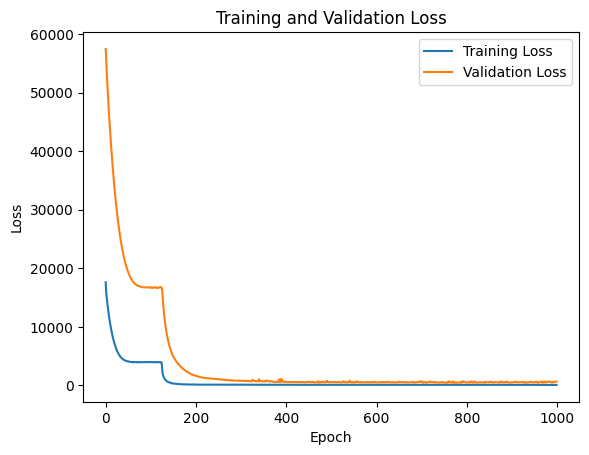

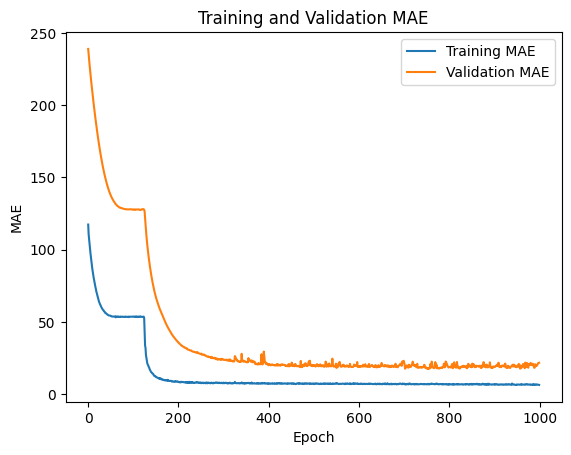

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



# Fit the model with the LossPlotter callback

# Compile the model with Adam optimizer and specific learning rate
optimizer = Adam()
regressor.compile(optimizer=optimizer, loss='mean_squared_error', metrics= [MeanAbsoluteError()])
# Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model_LSTM5_100.keras', monitor='val_mean_absolute_error', mode='min', save_best_only=True)

# Fitting the RNN to the Training set with the ModelCheckpoint callback
history = regressor.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_valid, y_valid), verbose=1, callbacks=[checkpoint])

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [7]:
# Find the epoch for the lowest MAE for training and validation
min_train_mae = min(history.history['mean_absolute_error'])
min_val_mae = min(history.history['val_mean_absolute_error'])

min_train_loss = min(history.history['loss'])
min_val_loss = min(history.history['val_loss'])

min_train_mae_epoch = history.history['mean_absolute_error'].index(min_train_mae) + 1
min_val_mae_epoch = history.history['val_mean_absolute_error'].index(min_val_mae) + 1

# Find the epoch for the lowest loss for training and validation
min_train_loss_epoch = history.history['loss'].index(min_train_loss) + 1
min_val_loss_epoch = history.history['val_loss'].index(min_val_loss) + 1

print("Lowest MAE for training: {:.4f} at epoch {}".format(min_train_mae, min_train_mae_epoch))
print("Lowest MAE for validation: {:.4f} at epoch {}".format(min_val_mae, min_val_mae_epoch))

print("Lowest loss for training: {:.4f} at epoch {}".format(min_train_loss, min_train_loss_epoch))
print("Lowest loss for validation: {:.4f} at epoch {}".format(min_val_loss, min_val_loss_epoch))


Lowest MAE for training: 6.3967 at epoch 1000
Lowest MAE for validation: 17.3605 at epoch 754
Lowest loss for training: 73.3798 at epoch 1000
Lowest loss for validation: 438.0606 at epoch 753


In [8]:
from keras.models import load_model
loaded_model = load_model ('best_model_LSTM5_100.keras')

loss, mae = loaded_model.evaluate(X_valid, y_valid)

print("Validation Loss:", loss)
print("Validation Mean Absolute Error:", mae)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 391.8226 - mean_absolute_error: 14.3946
Validation Loss: 447.0439453125
Validation Mean Absolute Error: 17.36052894592285


In [9]:
y_pred = loaded_model.predict(X_valid)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [10]:
y_pred [0]

array([224.29623], dtype=float32)

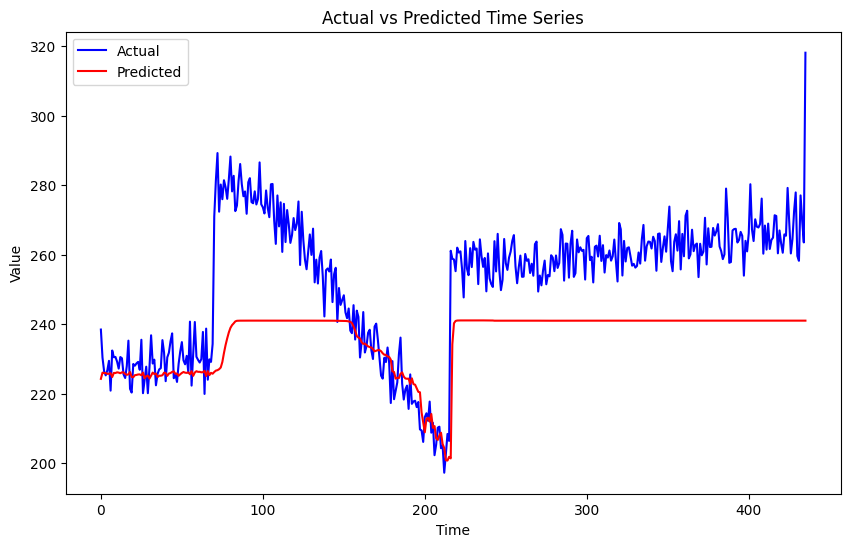

In [11]:
import matplotlib.pyplot as plt

# Assuming timestamps are available for both y_pred and y_valid
timestamps = range(len(y_valid))

# Plot y_pred vs y_valid
plt.figure(figsize=(10, 6))
plt.plot(timestamps, y_valid, label='Actual', color='blue')
plt.plot(timestamps, y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
